In [7]:
from dotenv import load_dotenv

load_dotenv()

True

In [8]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# !pip install -qU langchain-teddynote
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("CH17-LangGraph")

LangSmith 추적을 시작합니다.
[프로젝트명]
CH17-LangGraph


In [9]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    # 메시지 정의(list type이며 add_messages 함수를 사용하여 메시지를 추가)
    messages: Annotated[list, add_messages]

In [10]:
from langchain_openai import ChatOpenAI

# LLM 정의
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

# 챗봇 함수 정의
def chatbot(state: State):
    # 메시지 호출 및 반환
    return {"messages": llm.invoke(state["messages"])}

In [11]:
# 그래프 생성
graph_builder = StateGraph(State)

# 노드 이름, 함수 혹은 callable 객체를 인자로 받아 노드를 추가
graph_builder.add_node("chatbot", chatbot)

In [12]:
# 시작 노드에서 챗봇 노드로의 엣지 추가
graph_builder.add_edge(START, "chatbot")
# 그래프에 엣지 추가
graph_builder.add_edge("chatbot", END)

In [13]:
# 그래프 컴파일
graph = graph_builder.compile()

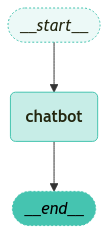

In [14]:
from langchain_teddynote.graphs import visualize_graph

# 그래프 시각화
visualize_graph(graph)

In [18]:
question = "서울의 유명한 맛집 TOP 10 추천해줘"

# 그래프 이벤트 스트리밍
for event in graph.stream({"messages": [("user", question)]}):
    # 이벤트 값 출력
    for value in event.values():
        print("Assistant:", value["messages"].content)


Assistant: 서울에는 다양한 맛집이 많아서 선택하기가 어렵지만, 다음은 서울에서 유명한 맛집 TOP 10을 추천해 드립니다.

1. **광장시장** - 전통 시장으로, 빈대떡, 마약김밥, 떡볶이 등 다양한 길거리 음식을 즐길 수 있습니다.

2. **이태원 부대찌개** - 부대찌개로 유명한 이곳은 푸짐한 양과 깊은 맛으로 많은 사랑을 받고 있습니다.

3. **명동교자** - 칼국수와 만두가 유명한 곳으로, 항상 많은 사람들이 줄 서서 기다리는 인기 맛집입니다.

4. **삼청동 수제비** - 수제비와 전통 한식을 맛볼 수 있는 아늑한 분위기의 식당입니다.

5. **한남동 소고기집** - 고급 한우를 맛볼 수 있는 곳으로, 고기 애호가들에게 추천합니다.

6. **홍대 돈부리** - 일본식 덮밥 전문점으로, 다양한 종류의 돈부리를 제공합니다.

7. **압구정 로데오 거리의 카페** - 다양한 디저트와 커피를 즐길 수 있는 세련된 카페들이 많습니다.

8. **신사동 가로수길의 브런치 카페** - 트렌디한 브런치 메뉴를 제공하는 카페들이 많아 인기가 높습니다.

9. **종로의 전통 한정식** - 전통 한정식을 맛볼 수 있는 곳으로, 다양한 반찬과 함께 정갈한 식사를 제공합니다.

10. **강남의 퓨전 한식** - 현대적인 감각으로 재해석한 한식을 제공하는 레스토랑들이 많아 새로운 맛을 경험할 수 있습니다.

각 맛집마다 특색이 있으니, 방문하실 때 참고하시기 바랍니다!
